In [13]:
!pip install kagglehub


In [5]:
import kagglehub

# Dataset 1
path1 = kagglehub.dataset_download("lukex9442/indian-bovine-breeds")
print("Path to dataset 1:", path1)

# Dataset 2
path2 = kagglehub.dataset_download("anandkumarsahu09/cattle-breeds-dataset")
print("Path to dataset 2:", path2)


100%|██████████| 2.84G/2.84G [00:36<00:00, 83.4MB/s]

Extracting files...


Path to dataset 1: /root/.cache/kagglehub/datasets/lukex9442/indian-bovine-breeds/versions/5


100%|██████████| 20.9M/20.9M [00:00<00:00, 125MB/s] 

Extracting files...


Path to dataset 2: /root/.cache/kagglehub/datasets/anandkumarsahu09/cattle-breeds-dataset/versions/1


In [6]:
import os

def find_image_root(base_path):
    for root, dirs, files in os.walk(base_path):
        for d in dirs:
            if d.lower() in ["indian_bovine_breeds", "cattle breeds"]:
                return os.path.join(root, d)
    raise FileNotFoundError("Image folder not found")

dataset1_path = find_image_root(path1)
dataset2_path = find_image_root(path2)

print("Dataset 1 images:", dataset1_path)
print("Dataset 2 images:", dataset2_path)


Dataset 1 images: /root/.cache/kagglehub/datasets/lukex9442/indian-bovine-breeds/versions/5/Indian_bovine_breeds
Dataset 2 images: /root/.cache/kagglehub/datasets/anandkumarsahu09/cattle-breeds-dataset/versions/1/Cattle Breeds


In [7]:
import shutil

IMAGE_EXTENSIONS = (".jpg", ".jpeg", ".png", ".bmp", ".webp")

def merge_dataset(source_path, target_path):
    for item in os.listdir(source_path):
        item_path = os.path.join(source_path, item)

        if not os.path.isdir(item_path):
            continue

        # Handle nested Indian_bovine_breeds folder
        if item.lower().startswith("indian"):
            merge_dataset(item_path, target_path)
            continue

        os.makedirs(os.path.join(target_path, item), exist_ok=True)

        for file in os.listdir(item_path):
            if file.lower().endswith(IMAGE_EXTENSIONS):
                shutil.copy(
                    os.path.join(item_path, file),
                    os.path.join(target_path, item, file)
                )


In [8]:
combined_root = "/content/combined_dataset"
os.makedirs(combined_root, exist_ok=True)

merge_dataset(dataset1_path, combined_root)
merge_dataset(dataset2_path, combined_root)

print("Merged classes:", os.listdir(combined_root))


Merged classes: ['Bhadawari', 'Nili_Ravi', 'Murrah', 'Ayrshire cattle', 'Umblachery', 'Red_Dane', 'Rathi', 'Vechur', 'Guernsey', 'Nagpuri', 'Bargur', 'Holstein Friesian cattle', 'Mehsana', 'Krishna_Valley', 'Holstein_Friesian', 'Hariana', 'Banni', 'Jaffrabadi', 'Khillari', 'Kherigarh', 'Nagori', 'Amritmahal', 'Kangayam', 'Kasargod', 'Ayrshire', 'Brown_Swiss', 'Jersey', 'Red_Sindhi', 'Malnad_gidda', 'Ongole', 'Deoni', 'Kenkatha', 'Dangi', 'Surti', 'Tharparkar', 'Nimari', 'Toda', 'Brown Swiss cattle', 'Gir', 'Red Dane cattle', 'Hallikar', 'Kankrej', 'Alambadi', 'Sahiwal', 'Jersey cattle', 'Pulikulam']


In [9]:
for breed in os.listdir(combined_root):
    breed_path = os.path.join(combined_root, breed)
    images = [f for f in os.listdir(breed_path)
              if f.lower().endswith(IMAGE_EXTENSIONS)]

    if len(images) == 0:
        print("Removing empty class:", breed)
        os.rmdir(breed_path)


In [19]:
from PIL import Image
import random
import torchvision.transforms as transforms

MIN_IMAGES = 150

augment = transforms.Compose([
    transforms.RandomRotation(25),
    transforms.RandomHorizontalFlip(),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.ColorJitter(brightness=0.3, contrast=0.3),
])

def generate_images(breed_path, target_count):
    images = [img for img in os.listdir(breed_path)
              if img.lower().endswith(IMAGE_EXTENSIONS)]

    if len(images) == 0:
        return

    count = len(images)
    i = 0

    while count < target_count:
        img_name = random.choice(images)
        img = Image.open(os.path.join(breed_path, img_name)).convert("RGB")
        aug_img = augment(img)
        aug_img.save(os.path.join(breed_path, f"aug_{i}_{img_name}"))
        count += 1
        i += 1


In [20]:
from PIL import Image
import random
import torchvision.transforms as transforms

MIN_IMAGES = 150

augment = transforms.Compose([
    transforms.RandomRotation(25),
    transforms.RandomHorizontalFlip(),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.ColorJitter(brightness=0.3, contrast=0.3),
])

def generate_images(breed_path, target_count):
    images = [img for img in os.listdir(breed_path)
              if img.lower().endswith(IMAGE_EXTENSIONS)]

    if len(images) == 0:
        return

    count = len(images)
    i = 0

    while count < target_count:
        img_name = random.choice(images)
        img = Image.open(os.path.join(breed_path, img_name)).convert("RGB")
        aug_img = augment(img)
        aug_img.save(os.path.join(breed_path, f"aug_{i}_{img_name}"))
        count += 1
        i += 1


In [21]:
for breed in os.listdir(combined_root):
    breed_path = os.path.join(combined_root, breed)
    img_count = len(os.listdir(breed_path))

    if img_count < MIN_IMAGES:
        print(f"Augmenting {breed}: {img_count} → {MIN_IMAGES}")
        generate_images(breed_path, MIN_IMAGES)


Augmenting Malnad_gidda: 107 → 150
Augmenting Alambadi: 99 → 150
Augmenting Vechur: 140 → 150
Augmenting Hariana: 129 → 150
Augmenting Bargur: 93 → 150
Augmenting Pulikulam: 124 → 150
Augmenting Kasargod: 95 → 150
Augmenting Nimari: 84 → 150
Augmenting Banni: 108 → 150
Augmenting Nagori: 89 → 150
Augmenting Kangayam: 91 → 150
Augmenting Surti: 59 → 150
Augmenting Jaffrabadi: 101 → 150
Augmenting Kherigarh: 36 → 150
Augmenting Guernsey: 119 → 150
Augmenting Rathi: 149 → 150
Augmenting Dangi: 82 → 150
Augmenting Nili_Ravi: 88 → 150
Augmenting Mehsana: 94 → 150
Augmenting Deoni: 99 → 150
Augmenting Krishna_Valley: 136 → 150
Augmenting Khillari: 113 → 150
Augmenting Kenkatha: 55 → 150
Augmenting Toda: 124 → 150
Augmenting Umblachery: 76 → 150
Augmenting Bhadawari: 86 → 150
Augmenting Amritmahal: 94 → 150


In [22]:
import os

dataset_path = "/content/combined_dataset"

print("📊 Image count per class:\n")

for breed in sorted(os.listdir(dataset_path)):
    breed_path = os.path.join(dataset_path, breed)
    if not os.path.isdir(breed_path):
        continue

    count = len([
        f for f in os.listdir(breed_path)
        if f.lower().endswith((".jpg",".jpeg",".png",".bmp",".webp"))
    ])

    print(f"{breed:<25} : {count}")


📊 Image count per class:

Alambadi                  : 150
Amritmahal                : 150
Ayrshire                  : 234
Ayrshire cattle           : 260
Banni                     : 150
Bargur                    : 150
Bhadawari                 : 150
Brown Swiss cattle        : 238
Brown_Swiss               : 225
Dangi                     : 150
Deoni                     : 150
Gir                       : 372
Guernsey                  : 150
Hallikar                  : 186
Hariana                   : 150
Holstein Friesian cattle  : 254
Holstein_Friesian         : 328
Jaffrabadi                : 150
Jersey                    : 203
Jersey cattle             : 252
Kangayam                  : 150
Kankrej                   : 178
Kasargod                  : 150
Kenkatha                  : 150
Kherigarh                 : 150
Khillari                  : 150
Krishna_Valley            : 150
Malnad_gidda              : 150
Mehsana                   : 150
Murrah                    : 173
Nagori        

In [23]:
from PIL import Image

bad_images = []

for breed in os.listdir(dataset_path):
    breed_path = os.path.join(dataset_path, breed)
    for img in os.listdir(breed_path):
        img_path = os.path.join(breed_path, img)
        try:
            with Image.open(img_path) as im:
                im.verify()
        except:
            bad_images.append(img_path)

print(f"❌ Corrupted images found: {len(bad_images)}")


❌ Corrupted images found: 0


In [25]:
import os, shutil, random

SOURCE_DIR = "/content/combined_dataset"
TRAIN_DIR  = "/content/dataset/train"
VAL_DIR    = "/content/dataset/val"

# Clean old dataset folder
if os.path.exists("/content/dataset"):
    shutil.rmtree("/content/dataset")

os.makedirs(TRAIN_DIR, exist_ok=True)
os.makedirs(VAL_DIR, exist_ok=True)

random.seed(42)
SPLIT_RATIO = 0.8

for breed in os.listdir(SOURCE_DIR):
    breed_path = os.path.join(SOURCE_DIR, breed)
    if not os.path.isdir(breed_path):
        continue

    images = [f for f in os.listdir(breed_path)
              if f.lower().endswith((".jpg",".jpeg",".png",".bmp",".webp"))]

    random.shuffle(images)
    split = int(len(images) * SPLIT_RATIO)

    train_imgs = images[:split]
    val_imgs   = images[split:]

    os.makedirs(os.path.join(TRAIN_DIR, breed), exist_ok=True)
    os.makedirs(os.path.join(VAL_DIR, breed), exist_ok=True)

    for img in train_imgs:
        shutil.copy(
            os.path.join(breed_path, img),
            os.path.join(TRAIN_DIR, breed, img)
        )

    for img in val_imgs:
        shutil.copy(
            os.path.join(breed_path, img),
            os.path.join(VAL_DIR, breed, img)
        )

print("✅ STEP-5 completed: Dataset split into train & validation")


✅ STEP-5 completed: Dataset split into train & validation


In [43]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

IMAGE_SIZE = 300

train_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(25),
    transforms.RandomResizedCrop(IMAGE_SIZE, scale=(0.7, 1.0)),
    transforms.ColorJitter(brightness=0.4, contrast=0.4),
    transforms.RandomPerspective(distortion_scale=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],
                         [0.229,0.224,0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],
                         [0.229,0.224,0.225])
])

train_data = ImageFolder(TRAIN_DIR, transform=train_transform)
val_data   = ImageFolder(VAL_DIR, transform=val_transform)

train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_data, batch_size=16)

print("Classes:", len(train_data.classes))


Classes: 46


In [44]:
import torch.nn as nn
from torchvision import models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

model = models.efficientnet_b3(pretrained=True)

# Freeze initially
for param in model.parameters():
    param.requires_grad = False

model.classifier = nn.Sequential(
    nn.Linear(model.classifier[1].in_features, 512),
    nn.BatchNorm1d(512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, len(train_data.classes))
)

model = model.to(device)


Using device: cuda


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B3_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [46]:
from collections import Counter

class_counts = Counter(train_data.targets)
total = sum(class_counts.values())

weights = [total / class_counts[i] for i in range(len(class_counts))]
weights = torch.FloatTensor(weights).to(device)

criterion = nn.CrossEntropyLoss(
    weight=weights,
    label_smoothing=0.1   # 🔥 improves generalization
)
print("Weight loss applied")

Weight loss applied


In [47]:
import torch.optim as optim

optimizer = optim.AdamW(
    model.parameters(),
    lr=1e-4,
    weight_decay=1e-4
)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode="min",
    patience=3,
    factor=0.3
)


In [48]:
from tqdm import tqdm

EPOCHS = 30
PATIENCE = 6
best_acc = 0.0
counter = 0

for epoch in range(EPOCHS):

    # 🔓 Fine-tuning
    if epoch == 5:
        print("🔓 Unfreezing model & lowering LR")
        for param in model.parameters():
            param.requires_grad = True

        optimizer = optim.AdamW(
            model.parameters(),
            lr=1e-5,          # 🔥 LOWER LR
            weight_decay=1e-4
        )

    model.train()
    train_loss = 0

    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_loader)

    model.eval()
    val_loss = 0
    correct = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == labels).sum().item()

    val_loss /= len(val_loader)
    accuracy = correct / len(val_data)

    scheduler.step(val_loss)

    print(f"Epoch {epoch+1} | "
          f"Train Loss: {train_loss:.4f} | "
          f"Val Loss: {val_loss:.4f} | "
          f"Accuracy: {accuracy:.4f}")

    # ✅ SAVE BY ACCURACY
    if accuracy > best_acc:
        best_acc = accuracy
        torch.save(model.state_dict(), "best_cattle_model.pth")
        print(f"✅ Model saved | Best Acc: {best_acc:.4f}")
        counter = 0
    else:
        counter += 1
        if counter >= PATIENCE:
            print("⛔ Early stopping triggered")
            break


 21%|██        | 90/426 [00:40<02:13,  2.52it/s]/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
100%|██████████| 426/426 [03:04<00:00,  2.30it/s]


Epoch 1 | Train Loss: 3.4960 | Val Loss: 9.2456 | Accuracy: 0.3220
✅ Model saved | Best Acc: 0.3220


100%|██████████| 426/426 [02:59<00:00,  2.38it/s]


Epoch 2 | Train Loss: 2.9704 | Val Loss: 8.3379 | Accuracy: 0.3787
✅ Model saved | Best Acc: 0.3787


100%|██████████| 426/426 [02:57<00:00,  2.40it/s]


Epoch 3 | Train Loss: 2.7655 | Val Loss: 13.8884 | Accuracy: 0.4167
✅ Model saved | Best Acc: 0.4167


100%|██████████| 426/426 [02:57<00:00,  2.40it/s]


Epoch 4 | Train Loss: 2.6186 | Val Loss: 5.1924 | Accuracy: 0.4418
✅ Model saved | Best Acc: 0.4418


100%|██████████| 426/426 [02:57<00:00,  2.40it/s]


Epoch 5 | Train Loss: 2.5447 | Val Loss: 16.2507 | Accuracy: 0.4728
✅ Model saved | Best Acc: 0.4728
🔓 Unfreezing model & lowering LR


100%|██████████| 426/426 [04:30<00:00,  1.58it/s]


Epoch 6 | Train Loss: 2.4285 | Val Loss: 11.0020 | Accuracy: 0.4904
✅ Model saved | Best Acc: 0.4904


100%|██████████| 426/426 [04:30<00:00,  1.57it/s]


Epoch 7 | Train Loss: 2.3382 | Val Loss: 6.6602 | Accuracy: 0.5313
✅ Model saved | Best Acc: 0.5313


100%|██████████| 426/426 [04:30<00:00,  1.58it/s]


Epoch 8 | Train Loss: 2.2643 | Val Loss: 4.0077 | Accuracy: 0.5395
✅ Model saved | Best Acc: 0.5395


100%|██████████| 426/426 [04:28<00:00,  1.58it/s]


Epoch 9 | Train Loss: 2.2130 | Val Loss: 3.3257 | Accuracy: 0.5541
✅ Model saved | Best Acc: 0.5541


100%|██████████| 426/426 [04:29<00:00,  1.58it/s]


Epoch 10 | Train Loss: 2.1692 | Val Loss: 4.1210 | Accuracy: 0.5658
✅ Model saved | Best Acc: 0.5658


100%|██████████| 426/426 [04:32<00:00,  1.57it/s]


Epoch 11 | Train Loss: 2.1183 | Val Loss: 3.2970 | Accuracy: 0.5786
✅ Model saved | Best Acc: 0.5786


100%|██████████| 426/426 [04:30<00:00,  1.58it/s]


Epoch 12 | Train Loss: 2.0675 | Val Loss: 2.7407 | Accuracy: 0.5979
✅ Model saved | Best Acc: 0.5979


100%|██████████| 426/426 [04:29<00:00,  1.58it/s]


Epoch 13 | Train Loss: 2.0266 | Val Loss: 4.9937 | Accuracy: 0.6119
✅ Model saved | Best Acc: 0.6119


100%|██████████| 426/426 [04:30<00:00,  1.57it/s]


Epoch 14 | Train Loss: 1.9790 | Val Loss: 2.1494 | Accuracy: 0.6160
✅ Model saved | Best Acc: 0.6160


100%|██████████| 426/426 [04:33<00:00,  1.56it/s]


Epoch 15 | Train Loss: 1.9505 | Val Loss: 2.4451 | Accuracy: 0.6178
✅ Model saved | Best Acc: 0.6178


100%|██████████| 426/426 [04:31<00:00,  1.57it/s]


Epoch 16 | Train Loss: 1.9100 | Val Loss: 1.9386 | Accuracy: 0.6406
✅ Model saved | Best Acc: 0.6406


100%|██████████| 426/426 [04:29<00:00,  1.58it/s]


Epoch 17 | Train Loss: 1.8876 | Val Loss: 1.9252 | Accuracy: 0.6376


100%|██████████| 426/426 [04:28<00:00,  1.59it/s]


Epoch 18 | Train Loss: 1.8561 | Val Loss: 2.0393 | Accuracy: 0.6423
✅ Model saved | Best Acc: 0.6423


100%|██████████| 426/426 [04:29<00:00,  1.58it/s]


Epoch 19 | Train Loss: 1.8197 | Val Loss: 2.1402 | Accuracy: 0.6493
✅ Model saved | Best Acc: 0.6493


100%|██████████| 426/426 [04:30<00:00,  1.58it/s]


Epoch 20 | Train Loss: 1.7918 | Val Loss: 1.9513 | Accuracy: 0.6487


100%|██████████| 426/426 [04:28<00:00,  1.59it/s]


Epoch 21 | Train Loss: 1.7556 | Val Loss: 2.9456 | Accuracy: 0.6639
✅ Model saved | Best Acc: 0.6639


100%|██████████| 426/426 [04:28<00:00,  1.59it/s]


Epoch 22 | Train Loss: 1.7529 | Val Loss: 1.8039 | Accuracy: 0.6809
✅ Model saved | Best Acc: 0.6809


100%|██████████| 426/426 [04:28<00:00,  1.59it/s]


Epoch 23 | Train Loss: 1.7138 | Val Loss: 1.7982 | Accuracy: 0.6791


100%|██████████| 426/426 [04:28<00:00,  1.59it/s]


Epoch 24 | Train Loss: 1.6817 | Val Loss: 1.8663 | Accuracy: 0.6756


100%|██████████| 426/426 [04:29<00:00,  1.58it/s]


Epoch 25 | Train Loss: 1.6624 | Val Loss: 1.7694 | Accuracy: 0.6844
✅ Model saved | Best Acc: 0.6844


100%|██████████| 426/426 [04:29<00:00,  1.58it/s]


Epoch 26 | Train Loss: 1.6290 | Val Loss: 1.7498 | Accuracy: 0.6955
✅ Model saved | Best Acc: 0.6955


100%|██████████| 426/426 [04:30<00:00,  1.57it/s]


Epoch 27 | Train Loss: 1.6187 | Val Loss: 1.7289 | Accuracy: 0.7037
✅ Model saved | Best Acc: 0.7037


100%|██████████| 426/426 [04:30<00:00,  1.58it/s]


Epoch 28 | Train Loss: 1.5782 | Val Loss: 1.7251 | Accuracy: 0.7084
✅ Model saved | Best Acc: 0.7084


100%|██████████| 426/426 [04:29<00:00,  1.58it/s]


Epoch 29 | Train Loss: 1.5747 | Val Loss: 1.7154 | Accuracy: 0.7095
✅ Model saved | Best Acc: 0.7095


100%|██████████| 426/426 [04:29<00:00,  1.58it/s]


Epoch 30 | Train Loss: 1.5449 | Val Loss: 1.7074 | Accuracy: 0.7107
✅ Model saved | Best Acc: 0.7107


In [53]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
import os

SAVE_DIR = "/content/drive/MyDrive/cattle_breed_model"

os.makedirs(SAVE_DIR, exist_ok=True)

print("Saving models to:", SAVE_DIR)


Saving models to: /content/drive/MyDrive/cattle_breed_model


In [55]:
MODEL_PATH = "/content/drive/MyDrive/cattle_breed_model/best_cattle_model.pth"

torch.save(model.state_dict(), MODEL_PATH)
print("✅ Model saved to Google Drive")


✅ Model saved to Google Drive


In [56]:
import os

MODEL_PATH = "/content/drive/MyDrive/cattle_breed_model/best_cattle_model.pth"

if os.path.exists(MODEL_PATH):
    print("✅ Model file exists at the given path")
    print("📁 File size:", os.path.getsize(MODEL_PATH) / (1024*1024), "MB")
else:
    print("❌ Model file NOT found")


✅ Model file exists at the given path
📁 File size: 44.440096855163574 MB


In [1]:
#Loading Model
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [13]:
#Ensure folder created for merged dataset while shifting from gpu to cpu

In [10]:
import os, shutil, random

SOURCE_DIR = "/content/combined_dataset"
TRAIN_DIR  = "/content/dataset/train"
VAL_DIR    = "/content/dataset/val"

# Safety cleanup
if os.path.exists("/content/dataset"):
    shutil.rmtree("/content/dataset")

os.makedirs(TRAIN_DIR, exist_ok=True)
os.makedirs(VAL_DIR, exist_ok=True)

random.seed(42)
SPLIT_RATIO = 0.8

for breed in os.listdir(SOURCE_DIR):
    breed_path = os.path.join(SOURCE_DIR, breed)
    if not os.path.isdir(breed_path):
        continue

    images = [f for f in os.listdir(breed_path)
              if f.lower().endswith((".jpg",".jpeg",".png",".bmp",".webp"))]

    random.shuffle(images)
    split = int(len(images) * SPLIT_RATIO)

    train_imgs = images[:split]
    val_imgs   = images[split:]

    os.makedirs(os.path.join(TRAIN_DIR, breed), exist_ok=True)
    os.makedirs(os.path.join(VAL_DIR, breed), exist_ok=True)

    for img in train_imgs:
        shutil.copy(os.path.join(breed_path, img),
                    os.path.join(TRAIN_DIR, breed, img))

    for img in val_imgs:
        shutil.copy(os.path.join(breed_path, img),
                    os.path.join(VAL_DIR, breed, img))

print("✅ Dataset split recreated")


✅ Dataset split recreated


In [11]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

val_transform = transforms.Compose([
    transforms.Resize((300,300)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],
                         [0.229,0.224,0.225])
])

train_data = ImageFolder(TRAIN_DIR, transform=val_transform)
val_data   = ImageFolder(VAL_DIR, transform=val_transform)

NUM_CLASSES = len(train_data.classes)
print("✅ Classes loaded:", NUM_CLASSES)


✅ Classes loaded: 46


In [12]:
import torch
import torch.nn as nn
from torchvision import models

device = torch.device("cpu")

model = models.efficientnet_b3(pretrained=False)
model.classifier = nn.Sequential(
    nn.Linear(model.classifier[1].in_features, 512),
    nn.BatchNorm1d(512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, 46)   # 👈 classes loaded = 46
)

MODEL_PATH = "/content/drive/MyDrive/cattle_breed_model/best_cattle_model.pth"

model.load_state_dict(
    torch.load(MODEL_PATH, map_location=device)
)

model.to(device)
model.eval()

print("✅ Model loaded successfully on CPU")


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


✅ Model loaded successfully on CPU


In [17]:
from torch.utils.data import DataLoader

val_loader = DataLoader(
    val_data,
    batch_size=16,
    shuffle=False
)

print("✅ Validation loader ready")


✅ Validation loader ready


In [18]:
import numpy as np

y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)

        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)

        y_true.extend(labels.numpy())
        y_pred.extend(preds.cpu().numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)

print("✅ Predictions completed")


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


✅ Predictions completed


In [19]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_true, y_pred)
print(f"\n🎯 Accuracy: {acc*100:.2f}%")



🎯 Accuracy: 81.87%


In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("\n📊 PERFORMANCE METRICS\n")

print("Precision (Macro)   :", precision_score(y_true, y_pred, average="macro"))
print("Recall (Macro)      :", recall_score(y_true, y_pred, average="macro"))
print("F1-Score (Macro)    :", f1_score(y_true, y_pred, average="macro"))

print("\nPrecision (Weighted):", precision_score(y_true, y_pred, average="weighted"))
print("Recall (Weighted)   :", recall_score(y_true, y_pred, average="weighted"))
print("F1-Score (Weighted) :", f1_score(y_true, y_pred, average="weighted"))



📊 PERFORMANCE METRICS

Precision (Macro)   : 0.8051469819430911
Recall (Macro)      : 0.8013385680801663
F1-Score (Macro)    : 0.7998259719787285

Precision (Weighted): 0.8229794937340739
Recall (Weighted)   : 0.8186851211072664
F1-Score (Weighted) : 0.818030852746669


In [21]:
from sklearn.metrics import classification_report

print("\n📋 CLASSIFICATION REPORT\n")

print(
    classification_report(
        y_true,
        y_pred,
        target_names=val_data.classes,
        digits=4
    )
)



📋 CLASSIFICATION REPORT

                          precision    recall  f1-score   support

                Alambadi     0.9500    0.9500    0.9500        20
              Amritmahal     0.8500    0.8947    0.8718        19
                Ayrshire     0.7843    0.8511    0.8163        47
         Ayrshire cattle     0.8750    0.9423    0.9074        52
                   Banni     0.7727    0.7727    0.7727        22
                  Bargur     0.9444    0.8947    0.9189        19
               Bhadawari     0.7368    0.7778    0.7568        18
      Brown Swiss cattle     0.9400    0.9792    0.9592        48
             Brown_Swiss     1.0000    0.8667    0.9286        45
                   Dangi     0.8421    0.9412    0.8889        17
                   Deoni     0.8696    1.0000    0.9302        20
                     Gir     0.8592    0.8133    0.8356        75
                Guernsey     0.9130    0.8750    0.8936        24
                Hallikar     0.7838    0.7632    

In [35]:
from google.colab import files

uploaded = files.upload()   # choose a cattle image


Saving jersey.jpg to jersey.jpg


In [36]:
import torch
import torch.nn as nn
from torchvision import models

device = torch.device("cpu")

model = models.efficientnet_b3(pretrained=False)
model.classifier = nn.Sequential(
    nn.Linear(model.classifier[1].in_features, 512),
    nn.BatchNorm1d(512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, 46)   # number of classes
)

MODEL_PATH = "/content/drive/MyDrive/cattle_breed_model/best_cattle_model.pth"

model.load_state_dict(
    torch.load(MODEL_PATH, map_location=device)
)

model.eval()
print("✅ Model loaded")


✅ Model loaded


In [37]:
from PIL import Image
import torchvision.transforms as transforms

IMAGE_SIZE = 300

transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],
                         [0.229,0.224,0.225])
])


In [38]:
import numpy as np

# Get uploaded image name
image_path = list(uploaded.keys())[0]

# Load and preprocess image
image = Image.open(image_path).convert("RGB")
image_tensor = transform(image).unsqueeze(0)  # add batch dimension

# Prediction
with torch.no_grad():
    outputs = model(image_tensor)
    probs = torch.softmax(outputs, dim=1)
    pred_class = torch.argmax(probs, dim=1).item()
    confidence = probs[0][pred_class].item()

# Get class name
predicted_breed = train_data.classes[pred_class]

print(f"🐄 Predicted Breed: {predicted_breed}")
print(f"📊 Confidence: {confidence*100:.2f}%")


🐄 Predicted Breed: Jersey
📊 Confidence: 51.41%


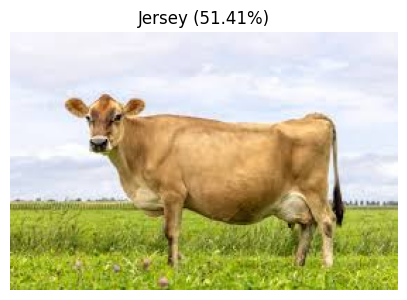

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.imshow(image)
plt.axis("off")
plt.title(f"{predicted_breed} ({confidence*100:.2f}%)")
plt.show()


In [40]:
!git config --global user.name "SarthMadaan001"
!git config --global user.email "sarthmadaan@gmail.com"


In [43]:
!git clone https://github.com/SarthMadaan001/cattle_breed_classifier.git


Cloning into 'cattle_breed_classifier'...


In [45]:
%cd cattle_breed_classifier


/content/cattle_breed_classifier


In [46]:
!cp /content/*.ipynb .
!cp /content/drive/MyDrive/cattle_breed_model/best_cattle_model.pth .


cp: cannot stat '/content/*.ipynb': No such file or directory
